In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    human_files = np.array(data['filenames'])
    human_targets = np_utils.to_categorical(np.array(data['target']), 5)
    return human_files, human_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('humanImages/train')
valid_files, valid_targets = load_dataset('humanImages/valid')
test_files, test_targets = load_dataset('humanImages/test')

# load list of human names
human_names = [item[20:-1] for item in sorted(glob("humanImages/train/*/"))]

# print statistics about the dataset
print('There are %d total human categories.' % len(human_names))
print('There are %s total human images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training human images.' % len(train_files))
print('There are %d validation human images.' % len(valid_files))
print('There are %d test human images.'% len(test_files))

Using TensorFlow backend.


There are 5 total human categories.
There are 193 total human images.

There are 126 training human images.
There are 45 validation human images.
There are 22 test human images.


In [3]:
print(train_files)

['humanImages/train\\01.Ankit\\Ankit (2).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (20).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (14).jpg'
 'humanImages/train\\02.Deepansh\\Deepansh (17).jpg'
 'humanImages/train\\04.Omkar\\Omkar (1).jpg'
 'humanImages/train\\05.Tanay\\Tanay (11).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (24).jpg'
 'humanImages/train\\04.Omkar\\Omkar (4).jpg'
 'humanImages/train\\01.Ankit\\Ankit (16).jpg'
 'humanImages/train\\05.Tanay\\Tanay (23).jpg'
 'humanImages/train\\01.Ankit\\Ankit (4).jpg'
 'humanImages/train\\04.Omkar\\Omkar (17).jpg'
 'humanImages/train\\05.Tanay\\Tanay (10).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (19).jpg'
 'humanImages/train\\04.Omkar\\Omkar (30).jpg'
 'humanImages/train\\01.Ankit\\Ankit (11).jpg'
 'humanImages/train\\05.Tanay\\Tanay (12).jpg'
 'humanImages/train\\04.Omkar\\Omkar (29).jpg'
 'humanImages/train\\02.Deepansh\\Deepansh (15).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (16).jpg'
 'humanImages/train\\03.Hitesh\\Hitesh (3)

In [4]:
import random
random.seed(8675309)


humanImages/train\02.Deepansh\Deepansh (17).jpg
Number of faces detected: 1


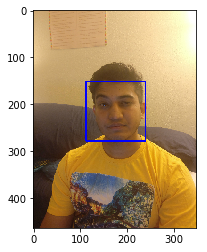

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(train_files[3])
height, width = img.shape[:2]
res = cv2.resize(img,(int(width/10), int(height/10)), interpolation = cv2.INTER_CUBIC)
print(train_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(res,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [6]:
img.size
height, width = img.shape[:2]
res = cv2.resize(img,(int(width/10), int(height/10)), interpolation = cv2.INTER_CUBIC)
res.size

484416

In [7]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    ##raw_img = cv2.imread(img_path)
    ##img = cv2.resize(raw_img,(int(224), int(224)), interpolation = cv2.INTER_CUBIC)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    #print(x.size)
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [9]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████████████████████████████████████| 22/22 [00:06<00:00,  3.33it/s]


In [10]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

### TODO: Define your architecture.
model = Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224,224,3)))
#model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(112,112,3)))
#model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(56,56,3)))
#model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(25,25,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Dropout(0.1))

#model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', input_shape=(28,28,3)))
##model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(25,25,3)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

#model.add(Dropout(0.1))

model.add(Dense(5, activation='softmax'))

model.add(GlobalAveragePooling2D(data_format=None))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)        8256      
__________

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100
#epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 126 samples, validate on 45 samples
Epoch 1/100
126/126 [==============================] - 8s - loss: 0.7157 - acc: 0.9127 - val_loss: 0.6802 - val_acc: 0.9778
Epoch 2/100
126/126 [==============================] - 8s - loss: 0.7560 - acc: 0.8651 - val_loss: 0.7821 - val_acc: 0.8444
Epoch 3/100
126/126 [==============================] - 8s - loss: 0.7170 - acc: 0.9127 - val_loss: 0.7326 - val_acc: 0.8889
Epoch 4/100
126/126 [==============================] - 7s - loss: 0.7353 - acc: 0.9206 - val_loss: 0.7167 - val_acc: 0.8667
Epoch 5/100
126/126 [==============================] - 7s - loss: 0.7417 - acc: 0.8730 - val_loss: 0.7651 - val_acc: 0.8667
Epoch 6/100
126/126 [==============================] - 8s - loss: 0.7357 - acc: 0.8492 - val_loss: 0.8035 - val_acc: 0.8444
Epoch 7/100
126/126 [==============================] - 8s - loss: 0.7178 - acc: 0.8889 - val_loss: 0.7197 - val_acc: 0.8667
Epoch 8/100
126/126 [==============================] - 8s - loss: 0.7516 - acc: 0.8571 

126/126 [==============================] - 8s - loss: 0.7337 - acc: 0.8889 - val_loss: 0.7503 - val_acc: 0.8444
Epoch 38/100
126/126 [==============================] - 8s - loss: 0.7203 - acc: 0.8810 - val_loss: 0.7118 - val_acc: 0.8444
Epoch 39/100
126/126 [==============================] - 8s - loss: 0.7320 - acc: 0.8333 - val_loss: 0.7052 - val_acc: 0.8444
Epoch 40/100
126/126 [==============================] - 8s - loss: 0.7064 - acc: 0.8730 - val_loss: 0.8369 - val_acc: 0.6222
Epoch 41/100
126/126 [==============================] - 8s - loss: 0.7479 - acc: 0.8889 - val_loss: 0.7403 - val_acc: 0.8444
Epoch 42/100
126/126 [==============================] - 8s - loss: 0.7096 - acc: 0.9444 - val_loss: 0.7095 - val_acc: 0.8667
Epoch 43/100
126/126 [==============================] - 8s - loss: 0.7180 - acc: 0.8810 - val_loss: 0.7276 - val_acc: 0.8444
Epoch 44/100
126/126 [==============================] - 8s - loss: 0.7032 - acc: 0.8968 - val_loss: 0.7011 - val_acc: 0.9778
Epoch 45/100


126/126 [==============================] - 7s - loss: 0.7054 - acc: 0.8571 - val_loss: 0.6789 - val_acc: 0.8667
Epoch 75/100
126/126 [==============================] - 7s - loss: 0.6884 - acc: 0.9206 - val_loss: 0.7285 - val_acc: 0.8444
Epoch 76/100
126/126 [==============================] - 7s - loss: 0.6983 - acc: 0.8810 - val_loss: 0.6526 - val_acc: 0.9778
Epoch 77/100
126/126 [==============================] - 7s - loss: 0.7169 - acc: 0.9286 - val_loss: 0.6805 - val_acc: 0.9556
Epoch 78/100
126/126 [==============================] - 7s - loss: 0.7024 - acc: 0.8889 - val_loss: 0.7758 - val_acc: 0.8444
Epoch 79/100
126/126 [==============================] - 7s - loss: 0.7078 - acc: 0.8810 - val_loss: 0.6574 - val_acc: 0.8667
Epoch 80/100
126/126 [==============================] - 7s - loss: 0.6905 - acc: 0.8889 - val_loss: 0.6601 - val_acc: 0.9778
Epoch 81/100
126/126 [==============================] - 7s - loss: 0.6896 - acc: 0.9286 - val_loss: 0.6963 - val_acc: 0.9333
Epoch 82/100


In [16]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [18]:
# get index of predicted person for each image in test set
friend_prediction = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(friend_prediction)==np.argmax(test_targets, axis=1))/len(friend_prediction)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 95.4545%
